In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

In [2]:
np.random.seed(222)

In [3]:
df = pd.read_csv("dataset/marks_dataset.csv")

In [4]:
df.head()

,test1,test2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Data: classes
feature 1: marks of test 1 <br>
feature 2: marks of test 2 <br>

outcome variable: 1(admission given) / 0(no admission)

## considering only two features since it is easy to visualize in 2D

In [5]:
X = df[["test1", "test2"]].values

In [6]:
# X[:, 0] = X[:, 0] * 5

In [7]:
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [8]:
X.shape

(100, 2)

In [9]:
y = df["admission"].values

## Class distribution

In [10]:
Counter(y)

Counter({0: 40, 1: 60})

In [11]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=222)

In [12]:
print(x_train.shape, y_train.shape)

(80, 2) (80,)


In [13]:
print(x_val.shape, y_val.shape)

(20, 2) (20,)


## Sklearn - Logistic regression

In [14]:
logreg = LogisticRegression(solver='sag', 
                            verbose=2, 
                            penalty='none', 
                            max_iter=10000000, 
                            multi_class="ovr")

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(x_train, y_train)

convergence after 3010 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000,
                   multi_class='ovr', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=2,
                   warm_start=False)

In [15]:
y_val_preds = logreg.predict(x_val)
y_preds_train = logreg.predict(x_train)

In [16]:
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
## Getting probability instead of just the class labels
logreg.predict_proba(x_val)

array([[0.2336743 , 0.7663257 ],
       [0.582504  , 0.417496  ],
       [0.39263769, 0.60736231],
       [0.56426461, 0.43573539],
       [0.28184286, 0.71815714],
       [0.25066586, 0.74933414],
       [0.34699667, 0.65300333],
       [0.5863501 , 0.4136499 ],
       [0.58671658, 0.41328342],
       [0.34808762, 0.65191238],
       [0.56334907, 0.43665093],
       [0.18651985, 0.81348015],
       [0.21849922, 0.78150078],
       [0.23145746, 0.76854254],
       [0.10504376, 0.89495624],
       [0.43588171, 0.56411829],
       [0.23510718, 0.76489282],
       [0.31905539, 0.68094461],
       [0.48635622, 0.51364378],
       [0.22069654, 0.77930346]])

Confusion matrix, without normalization
[[ 5  3]
 [ 0 12]]


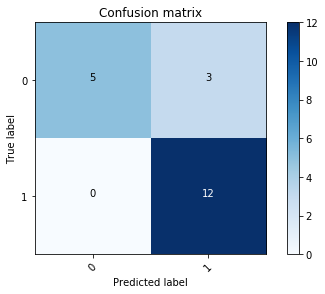

In [18]:
cnf_matrix = confusion_matrix(y_val, y_val_preds)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=["0", "1"],
                      title='Confusion matrix')

## Classification report

In [19]:
print(classification_report(y_val, y_val_preds))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.80      1.00      0.89        12

    accuracy                           0.85        20
   macro avg       0.90      0.81      0.83        20
weighted avg       0.88      0.85      0.84        20



## Decision boundary

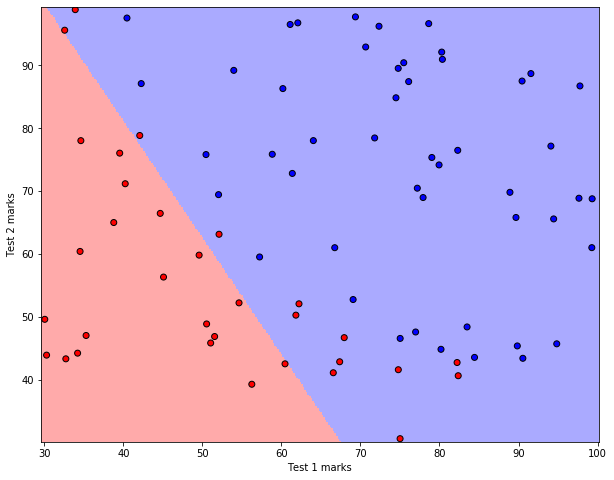

In [20]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .2  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=cmap_bold)
plt.xlabel('Test 1 marks')
plt.ylabel('Test 2 marks')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()